In [583]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sns
import seaborn.objects as so
from scipy.optimize import curve_fit

In [584]:
df = pd.read_csv('many.csv')
df = df.append(pd.read_csv('all.csv'))
df['efficiency'] = df['attack'] / df['exchange']
df_no_braid = df[df['group'] != 'Braid4']
df_no_braid = df_no_braid[df_no_braid['group'] != 'Braid5']


/var/folders/xy/7x33379123vd25mldyhv3q7m0000gn/T/ipykernel_87082/2254527000.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv('all.csv'))


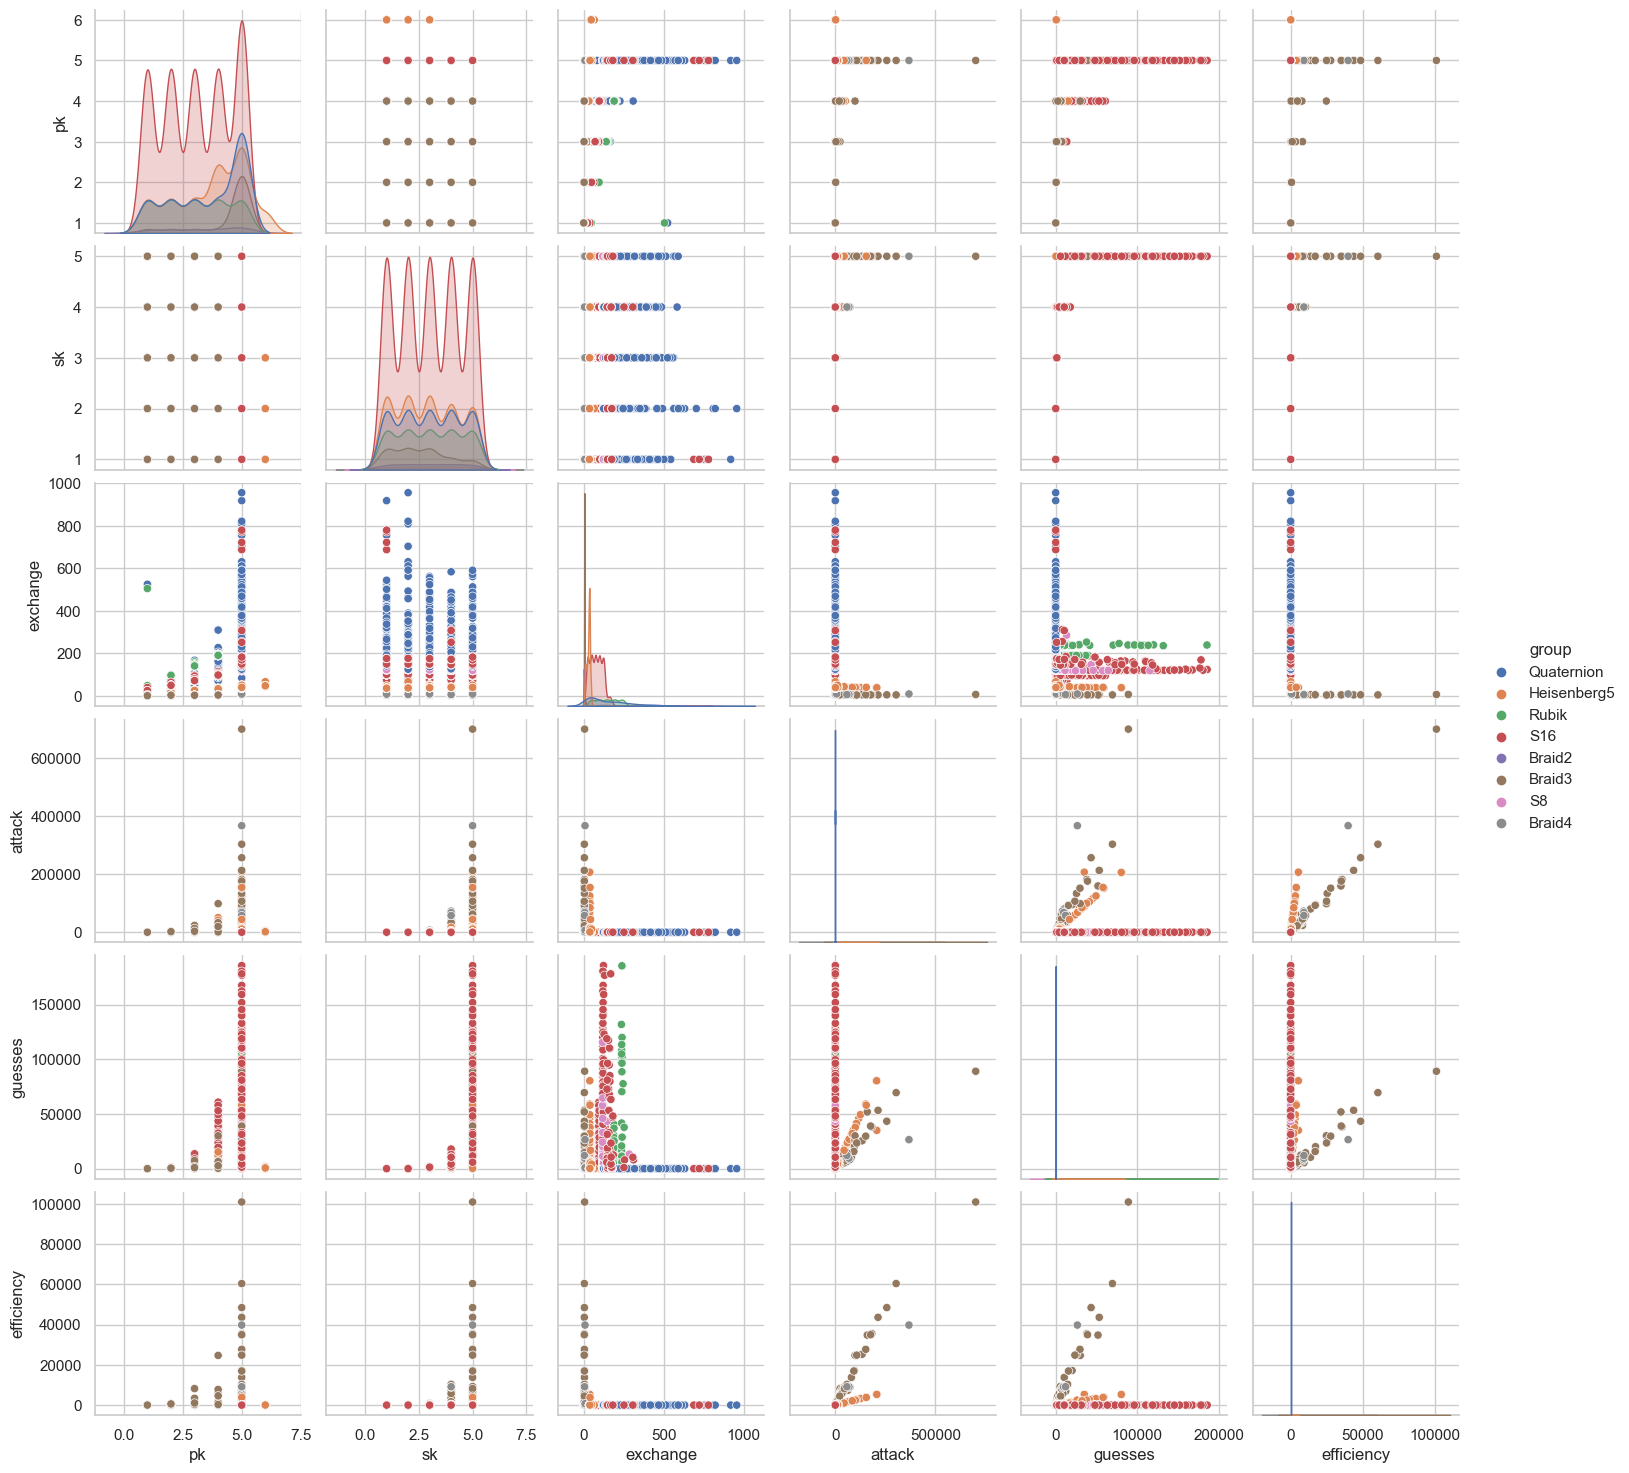

In [585]:
sns.set_theme(style="whitegrid")
gfg = sns.pairplot(data=df[df['sk'] <= 5], hue='group')
plt.show()

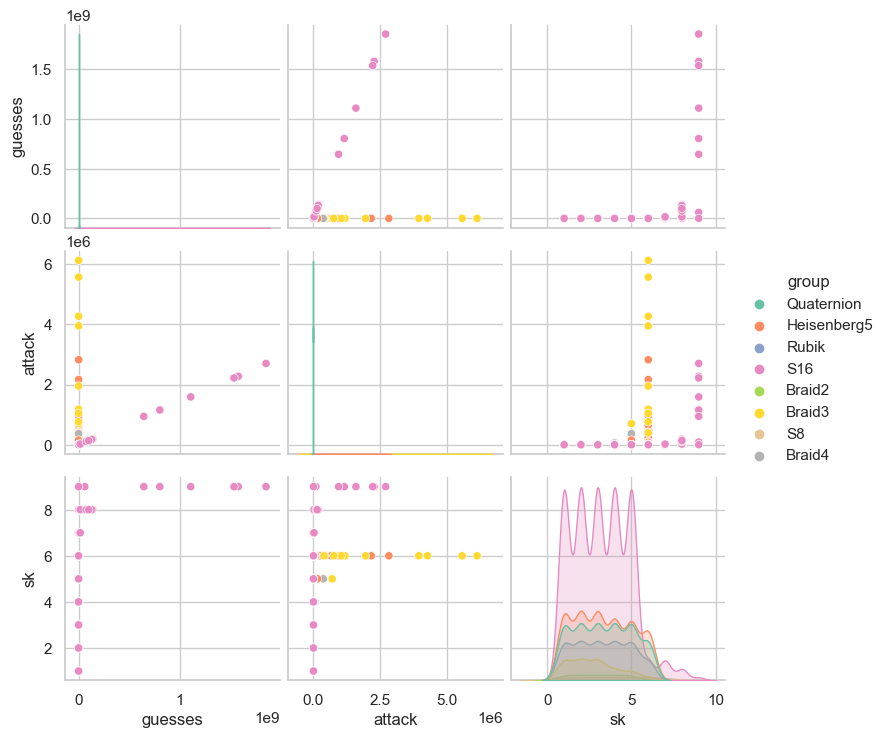

In [586]:
sns.set_theme(style="whitegrid")
gfg = sns.pairplot(data=df, hue='group', vars=['guesses', 'attack', 'sk'], palette='Set2')
plt.show()

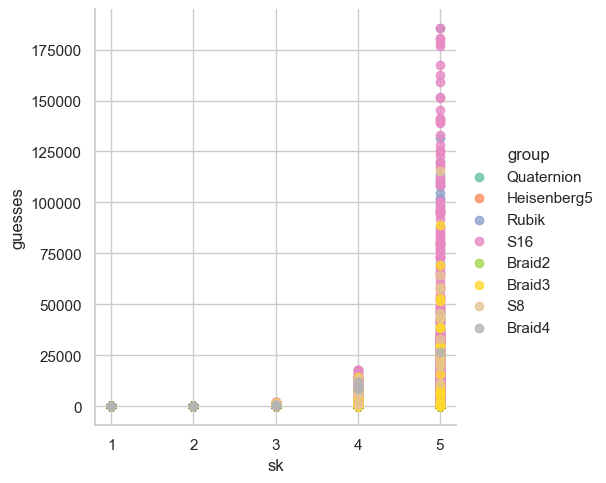

In [587]:
# compare effects of sk and cardinality on attack time/exchange time
sns.set_theme(style="whitegrid")
gfg = sns.lmplot(data=df[(df.sk<=5)], x='sk', y='guesses', hue='group', palette='Set2', fit_reg=False)

Text(0.5, 1.0, 'Guess rate by group')

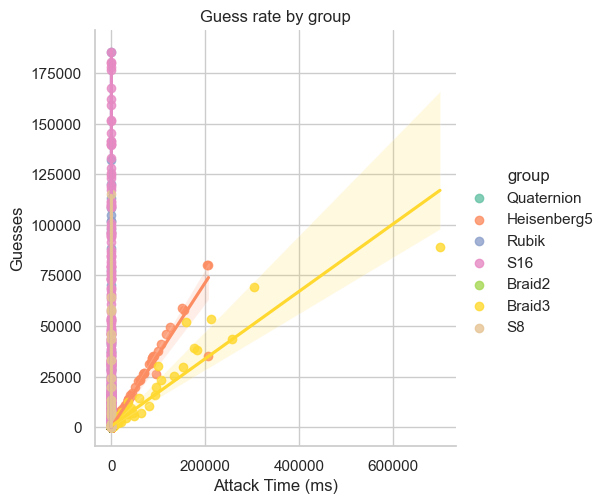

In [588]:
sns.set_theme(style="whitegrid")
gfg = sns.lmplot(data=df_no_braid[df_no_braid['sk']<=5], x='attack', y='guesses', hue='group', palette='Set2', fit_reg=True)
plt.ylabel("Guesses")
plt.xlabel("Attack Time (ms)")
plt.title("Guess rate by group")

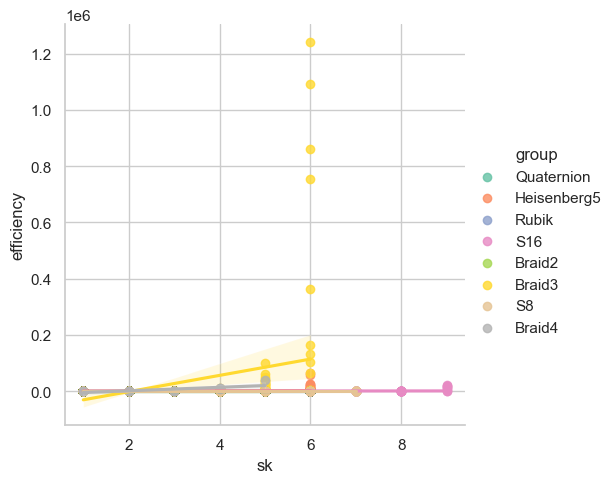

In [589]:
# compare effects of sk and cardinality on attack time/exchange time
sns.set_theme(style="whitegrid")
gfg = sns.lmplot(data=df, x='sk', y='efficiency', hue='group', palette='Set2')

TypeError: '<=' not supported between instances of 'str' and 'float'

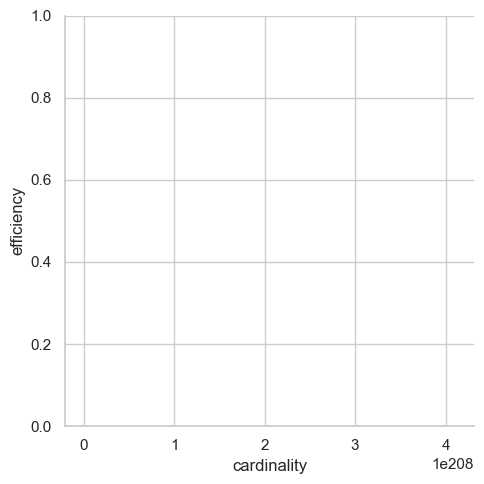

In [590]:
# compare effects of sk and cardinality on attack time/exchange time
sns.set_theme(style="whitegrid")
gfg = sns.lmplot(data=df, x='cardinality', y='efficiency', hue='sk', palette='Set2')

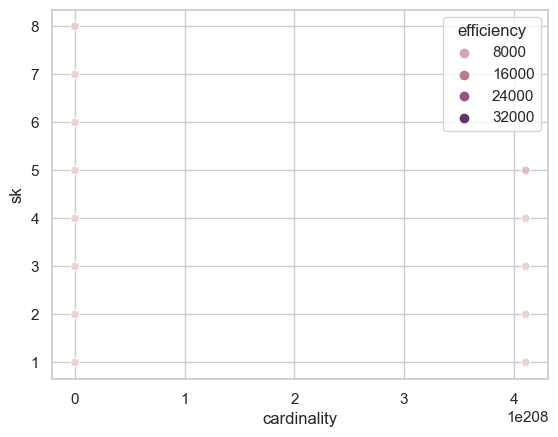

In [ ]:
# compare effects of sk and cardinality on attack time/exchange time
sns.set_theme(style="whitegrid")
df['efficiency'] = df['attack'] / df['exchange']
gfg = sns.scatterplot(data=df, x='cardinality', y='sk', hue='efficiency')

S16: 2.1287846969343818, 0.13909741317175783
Rubik: 2.1389605823652214, 0.09449157242158941
Braid3: 1.921363341226056, 0.29835884434267945
Heisenberg5: 1.6881462981260242, 0.5889829647649316
Quaternion: 0.03312148945037661, 1.4755070471571383


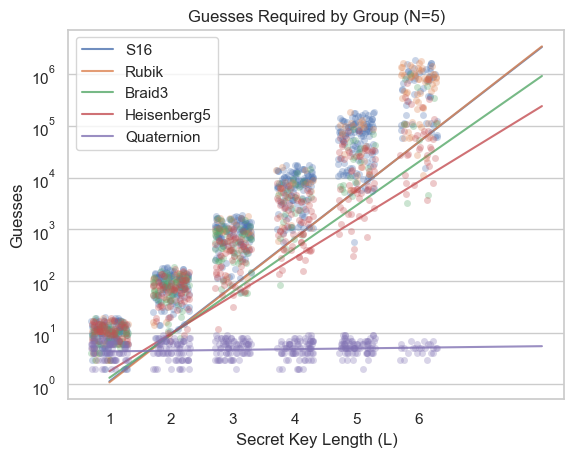

In [599]:
# compare effects of sk and cardinality on attack time/exchange time
sns.set_theme(style="whitegrid")
#gfg = sns.lmplot(data=df[df.sk<=5], x='sk', y='guesses', hue='group', palette='Set2', fit_reg=False, legend=False)

# for each group, perform regression
for group in ['S16', 'Rubik', 'Braid3', 'Heisenberg5', 'Quaternion']:
    df_group = df[(df.pk==5)&(df.sk <=6)&(df.group == group)]
    sns.stripplot(data=df_group, x='sk', y='guesses', alpha=0.3, jitter=0.3)
    #plt.scatter(df_group['sk'], df_group['guesses'], label=group, alpha=0.5)

    a, b = np.polyfit(df_group['sk'], np.log(df_group['guesses']), 1)
    print(f'{group}: {a}, {b}')
    x = np.linspace(min(df_group['sk'])-1, max(df_group['sk'])+1, 100)
    y = np.exp(b) * np.exp(a * x)

    # generate dataframe
    #df2 = pd.DataFrame({'x': x, 'y': y})
    sns.lineplot(x=x, y=y, label=group, alpha=0.8)
    #plt.plot(x, y, label=group)
leg = plt.legend()
plt.yscale('log')
plt.title("Guesses Required by Group (N=5)")
plt.xlabel("Secret Key Length (L)")
plt.ylabel("Guesses")
plt.savefig('guesses.pdf', bbox_inches='tight')

S16: 2, 20
S16: 0.7636231077815685, 2.2806559525738677, 11.736518015551782
Heisenberg5: 3, 19
Heisenberg5: 1.4120445525394407, 1.8952624694157074, 3.0000341265262556
Rubik: 3, 19
Rubik: 0.6531088491005956, 2.3017842741437615, 18.999999997293006
Braid3: 3, 19
Braid3: 0.13696077029516962, 2.454434180300823, 11.230395044627185


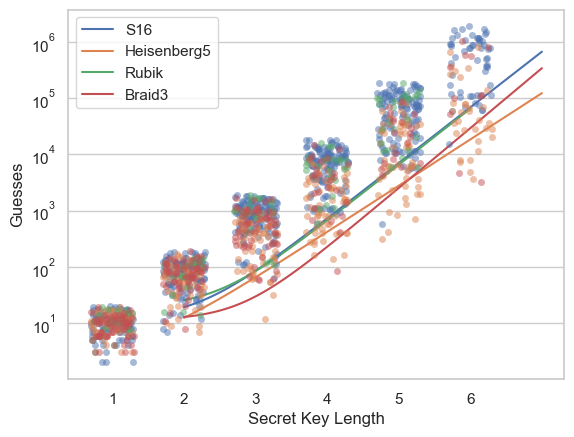

In [ ]:
# compare effects of sk and cardinality on attack time/exchange time
sns.set_theme(style="whitegrid")
#gfg = sns.lmplot(data=df[df.sk<=5], x='sk', y='guesses', hue='group', palette='Set2', fit_reg=False, legend=False)

# for each group, perform regression
for group in ['S16', 'Heisenberg5', 'Rubik', 'Braid3']:
    df_group = df[(df.pk==5)&(df.sk <=6)&(df.group == group)]
    sns.stripplot(data=df_group, x='sk', y='guesses', alpha=0.5, jitter=0.3)
    #plt.scatter(df_group['sk'], df_group['guesses'], label=group, alpha=0.5)
    max_guesses_sk_1 = max(df_group[df_group.sk==1]['guesses'])
    min_guesses_sk_1 = min(df_group[df_group.sk==1]['guesses'])
    print(f'{group}: {min_guesses_sk_1}, {max_guesses_sk_1}')

    def func(x, a, b, c):
        return (a * np.exp(b * (x))) + c
    popt, pcov = curve_fit(func, df_group['sk'], df_group['guesses'], p0=(0, 1, (min_guesses_sk_1+max_guesses_sk_1)/2), bounds=([-np.inf, -np.inf, min_guesses_sk_1], [np.inf, np.inf, max_guesses_sk_1]))
    a, b, c = popt
    #a, b = np.polyfit(df_group['sk'], np.log(df_group['guesses']), 1)
    print(f'{group}: {a}, {b}, {c}')
    x = np.linspace(np.min(df_group['sk']), np.max(df_group['sk']), 100)
    y = func(x, *popt)

    # generate dataframe
    #df2 = pd.DataFrame({'x': x, 'y': y})
    sns.lineplot(x=x, y=y, label=group)
    #plt.plot(x, y, label=group)
leg = plt.legend()
plt.yscale('log')
plt.xlabel("Secret Key Length")
plt.ylabel("Guesses")
plt.show()

S16: 1.117813796148699, 2.204146837141313, 1.1268383257214805
Braid3: 17.674079341419773, 1.4063488620266955, 2.064897580450909e-10
Heisenberg5: 0.31981645969477546, 2.1940128392164504, 61.31238743287258
Quaternion: 4.649377277457161, 0.03605588909650335, 2.8326728086621803e-12


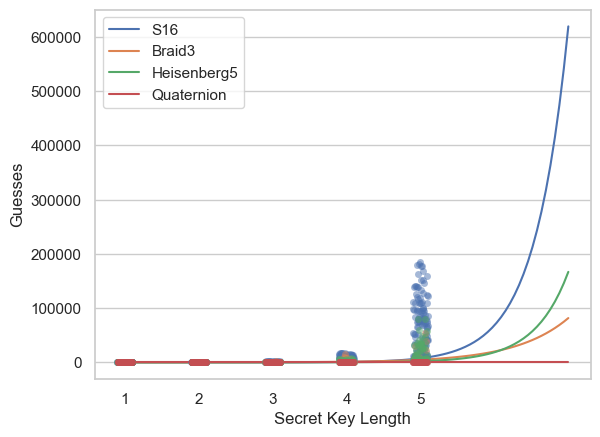

In [ ]:
# compare effects of sk and cardinality on attack time/exchange time
sns.set_theme(style="whitegrid")
#gfg = sns.lmplot(data=df[df.sk<=5], x='sk', y='guesses', hue='group', palette='Set2', fit_reg=False, legend=False)

# for each group, perform regression
for group in ['S16', 'Braid3', 'Heisenberg5','Quaternion']:
    df_group = df[(df.pk==5)&(df.sk<=5)&(df.group == group)]
    sns.stripplot(data=df_group, x='sk', y='guesses', alpha=0.5)
    #plt.scatter(df_group['sk'], df_group['guesses'], label=group, alpha=0.5)
    def func(x, a, b, c):
        return a * np.exp(b * x) + c

    popt, pcov = curve_fit(func, df_group['sk'], df_group['guesses'], p0=(1, 1, 1), bounds=([0, 0, 0], [np.inf, np.inf, np.inf]))
    a, b, c = popt
    #a, b = np.polyfit(df_group['sk'], np.log(df_group['guesses']), 1)
    print(f'{group}: {a}, {b}, {c}')
    x = np.linspace(0, max(df_group['sk'])+1, 100)
    y = func(x, *popt)

    # generate dataframe
    #df2 = pd.DataFrame({'x': x, 'y': y})
    sns.lineplot(x=x, y=y, label=group)
    #plt.plot(x, y, label=group)
leg = plt.legend()
#plt.yscale('log')

plt.xlabel("Secret Key Length")
plt.ylabel("Guesses")
plt.show()

S16: 1.9450358593444605e-06, 3.0312106768952414, 0.02239937773915599
Heisenberg5: 2.381213182248469, 1.9904668123392382, 54.874697972533006
Rubik: 0.0003047782442366775, 2.487142238886042, 0.0233314005631626
Braid3: 0.2070267817388089, 2.7037324010599777, 83.16292902984496
S8: 0.11048348820821155, 1.0958425486385746, 0.07199999999011256


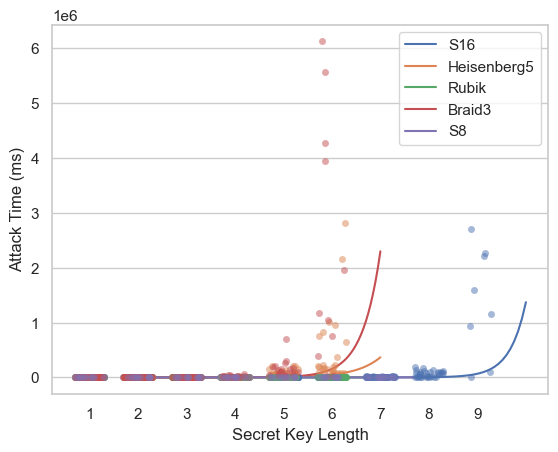

In [596]:
# compare effects of sk and cardinality on attack time/exchange time
sns.set_theme(style="whitegrid")
#gfg = sns.lmplot(data=df[df.sk<=5], x='sk', y='guesses', hue='group', palette='Set2', fit_reg=False, legend=False)

# for each group, perform regression
for group in ['S16', 'Heisenberg5', 'Rubik', 'Braid3']:
    df_group = df[(df.pk==5)&(df.sk <=9)&(df.group == group)]
    sns.stripplot(data=df_group, x='sk', y='attack', alpha=0.5, jitter=0.3)
    #plt.scatter(df_group['sk'], df_group['guesses'], label=group, alpha=0.5)

    max_attack_time_sk_1 = max(df_group[df_group.sk==1]['attack'])
    min_attack_time_sk_1 = min(df_group[df_group.sk==1]['attack'])

    def func(x, a, b, c):
        return (a * np.exp(b*(x))) + c
    popt, pcov = curve_fit(func, df_group['sk'], df_group['attack'], p0=(0, 1, (max_attack_time_sk_1+min_attack_time_sk_1)/2), bounds=([-np.inf, -np.inf, min_attack_time_sk_1/3], [np.inf, np.inf, max_attack_time_sk_1*3]))
    a, b, c = popt
    #a, b = np.polyfit(df_group['sk'], np.log(df_group['guesses']), 1)
    print(f'{group}: {a}, {b}, {c}')
    x = np.linspace(np.min(df_group['sk']), np.max(df_group['sk']), 100)
    y = func(x, *popt)

    # generate dataframe
    #df2 = pd.DataFrame({'x': x, 'y': y})
    sns.lineplot(x=x, y=y, label=group)
    #plt.plot(x, y, label=group)
leg = plt.legend()
#plt.yscale('log')
plt.xlabel("Secret Key Length")
plt.ylabel("Attack Time (ms)")
plt.show()

/var/folders/xy/7x33379123vd25mldyhv3q7m0000gn/T/ipykernel_87082/1605875212.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['guesses'] = np.log(df_group['guesses'])


Text(52.490624999999994, 0.5, 'Guesses (log scale)')

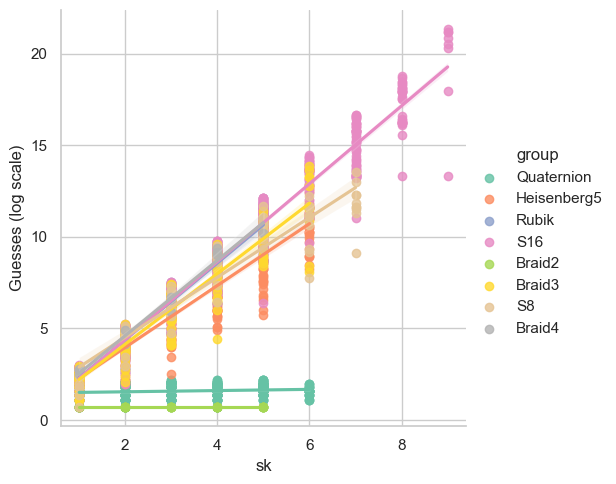

In [ ]:
# compare effects of sk and cardinality on attack time/exchange time
sns.set_theme(style="whitegrid")

df_group = df[(df.pk==5)]
df_group['guesses'] = np.log(df_group['guesses'])

gfg = sns.lmplot(data=df_group, x='sk', y='guesses', hue='group', palette='Set2', fit_reg=True, legend=True)
plt.ylabel("Guesses (log scale)")

# generate dataframe
#df2 = pd.DataFrame({'x': x, 'y': y})
#sns.lmplot(df_group, x='sk', y='guesses', hue='group', palette='Set2', fit_reg=True, legend=True)